In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import math

In [3]:
# ODE classes

# exponential ODE dy/dx = k*y
class ode_exponential:
    def __init__(self,_k):
        print('Creating ODE: exponential')
        self.k = _k
        self.initial = [self.exact_solution(0.),0.]
        
    def first_derivative(self,pair):
        return self.k*pair[0]
    
    # initial values are part of the ODE information
    def initial_val(self):
        return self.initial
    
    def exact_solution(self,t):
        return math.exp(self.k*t)
    
# polynomial ODE with arbitrary coefficients y = c[0]+c[1]*x+c{2}*x^2+..
class ode_polynomial:
    def __init__(self,_coeffs):
        print('Creating ODE: polynomial')
        self.coeffs = _coeffs
        self.initial = [self.exact_solution(0.),0.]
        
    def first_derivative(self,pair):
        val = 0.
        for power in range(len(self.coeffs)-1):
            val+=(power+1)*self.coeffs[power+1]*math.pow(pair[1],float(power))
        return val
        # return np.sum([(power+1)*self.coeffs[power+1]*math.pow(pair[1],float(power)) for power in range(len(self.coeffs)-1)])
        
    def initial_val(self):
        return self.initial
    
    def exact_solution(self,t):
        val = 0.
        for power in range(len(self.coeffs)):
            val+=self.coeffs[power]*math.pow(t,float(power))
        return val
        # return np.sum([self.coeffs[power]*math.pow(t,float(power)) for power in range(len(self.coeffs))])  

# sinusoidal ODE with period omega
class ode_sinusoid:
    def __init__(self,omega):
        print('Creating ODE: sinusoid')
        self.omega = omega
        self.initial = [self.exact_solution(0.),0.]
        
    def first_derivative(self,pair):
        return np.cos(self.omega*pair[1])
    
    def initial_val(self):
        return self.initial
    
    def exact_solution(self,t):
        return np.sin(self.omega*t)

In [9]:
# integration algorithms

class step_euler:
    def dy(self,ode,pair,dt):
        dy = ode.first_derivative(pair)*dt
        return [dy,dt]
    
class step_rk0:
    def dy(self,ode,pair,dt):
        midpoint = [pair[0]+ode.first_derivative(pair)*dt/2.,pair[1]+dt/2.]
        return [ode.first_derivative(midpoint)*dt,dt]
    
class step_rk:
    def dy(self,ode,pair,dt):
        y = pair[0]
        t = pair[1]
        d1 = ode.first_derivative([y,t])
        d2 = ode.first_derivative([y+dt/2.*d1,t+dt/2.])
        d3 = ode.first_derivative([y+dt/2.*d2,t+dt/2.])
        d4 = ode.first_derivative([y+dt*d3,t+dt])
        return [dt*(1./6.)*(d1+2*d2+2*d3+d4),dt]

In [10]:
# engine to run everything
class engine:
    def __init__(self,ode,step,title):
        self.ode = ode
        self.step = step
        self.title = title
        
    def go(self,nsteps,dt):        
        # 2d array [[y0,t0],[y1,t1],...]
        results = []
        # add initial values to results array
        results.append(self.ode.initial_val())
            
        # iterate algorithms
        for i in range(nsteps):
            change = self.step.dy(self.ode,results[i],dt)
            results.append([results[i][0]+change[0],results[i][1]+change[1]])
                    
        print('Engine has finished with',self.title)
        return results  

In [11]:
def main(function,nsteps,delta):
    
    print('Running ODE integration for',function,'with nsteps=',nsteps,' and dt=',delta)
    
    # create ODE
    if(function=='exp'):
        ode = ode_exponential(1.)
    elif(function=='poly'):
        ode = ode_polynomial([1.,-6,3])
    elif(function=='sin'):
        ode = ode_sinusoid(1.)
    else:
        print('Incorrect function input', function)
        quit()
        
    # create integration objects    
    euler_step = step_euler()
    euler_engine = engine(ode,euler_step,'Euler')
    
    rk0_step = step_rk0()
    rk0_engine = engine(ode,rk0_step,'RK0')
    
    rk_step = step_rk()
    rk_engine = engine(ode,rk_step,'RK')
    
    results_euler = euler_engine.go(nsteps,delta)
    results_rk0 = rk0_engine.go(nsteps,delta)
    results_rk = rk_engine.go(nsteps,delta)
    results_exact = [ode.exact_solution(row[1]) for row in results_euler]
    
    plt.figure(figsize=(20,10))
    plt.plot([row[1] for row in results_euler],[row[0] for row in results_euler],'g+')
    plt.plot([row[1] for row in results_rk0],[row[0] for row in results_rk0],'b+')
    plt.plot([row[1] for row in results_rk],[row[0] for row in results_rk],'r+')
    plt.plot([row[1] for row in results_euler],results_exact)
    
    return np.array(results_euler), np.array(results_rk0), np.array(results_rk), np.array(results_exact)
    

('Running ODE integration for', 'sin', 'with nsteps=', 100, ' and dt=', 0.5)
Creating ODE: sinusoid
('Engine has finished with', 'Euler')
('Engine has finished with', 'RK0')
('Engine has finished with', 'RK')


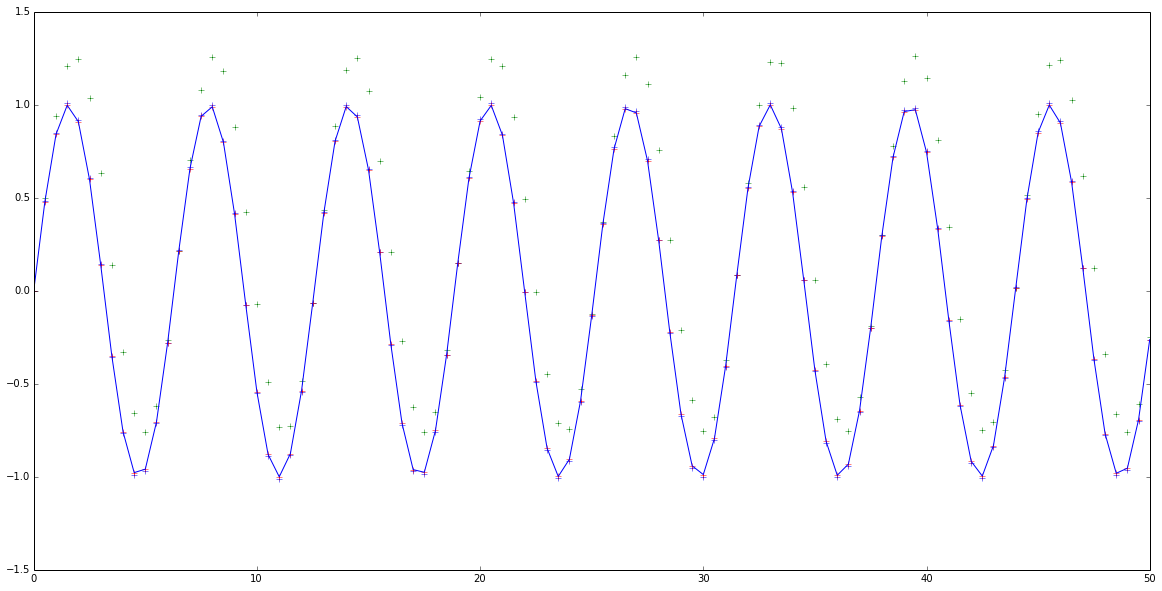

In [18]:
results_euler, results_rk0, results_rk, results_exact = main('sin',100,0.5)

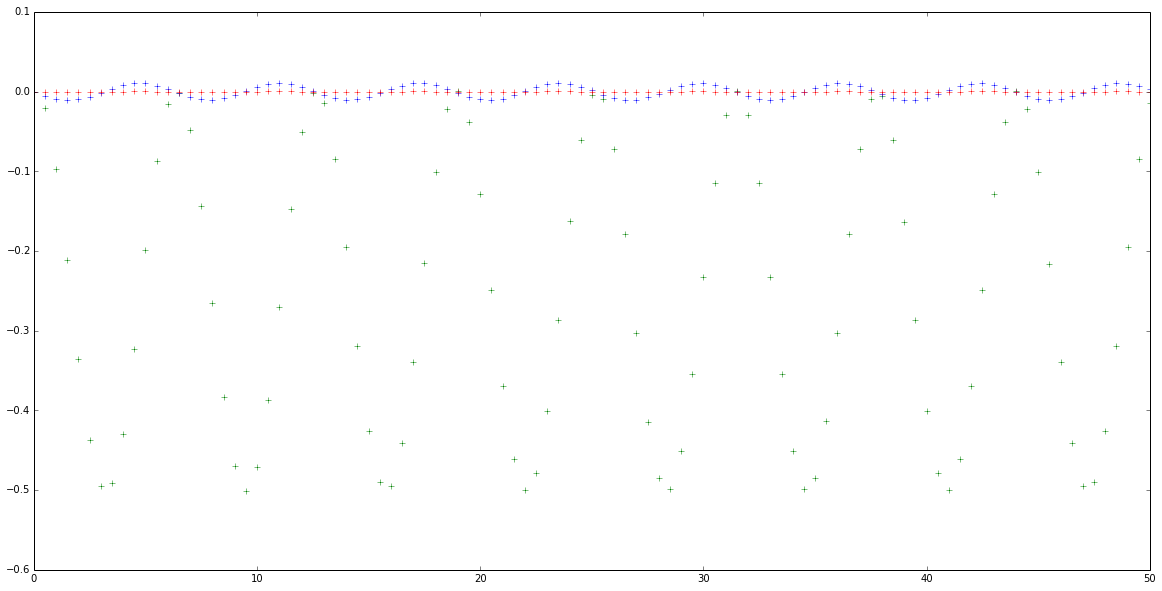

In [20]:
plt.figure(figsize=(20,10))
plt.plot([row[1] for row in results_euler],results_exact-[row[0] for row in results_euler],'g+')
plt.plot([row[1] for row in results_rk0],results_exact-[row[0] for row in results_rk0],'b+')
plt.plot([row[1] for row in results_rk],results_exact-[row[0] for row in results_rk],'r+')